### single input (density) single output (CH)：  


In [1]:
import numpy as np
import torch
from torch import nn
import matplotlib.pyplot as plt
from torch import nn, optim, autograd
from torch.nn import functional as F

In [2]:
from scipy import io
y = dict()
y['low'] = io.loadmat('20x20_100_CH.mat')['CH']
y['hi'] = io.loadmat('200x200_100_CH.mat')['CH']

### plot the primitive data

### using diffenent number of hi sample points for hi prediction

In [3]:
class Unit(nn.Module):

    def __init__(self, in_N, out_N):
        super(Unit, self).__init__()
        self.in_N = in_N
        self.out_N = out_N
        self.L = nn.Linear(in_N, out_N)

    def forward(self, x):
        x1 = self.L(x)
        x2 = torch.tanh(x1)
        return x2


class NN1(nn.Module):

    def __init__(self, in_N, width, depth, out_N):
        super(NN1, self).__init__()
        self.width = width
        self.in_N = in_N
        self.out_N = out_N
        self.stack = nn.ModuleList()

        self.stack.append(Unit(in_N, width))

        for i in range(depth):
            self.stack.append(Unit(width, width))

        self.stack.append(nn.Linear(width, out_N))

    def forward(self, x):
        # first layer
        for i in range(len(self.stack)):
            x = self.stack[i](x)
        return x


class NN2(nn.Module):
    def __init__(self, in_N, width, depth, out_N):
        super(NN2, self).__init__()
        self.in_N = in_N
        self.width = width
        self.depth = depth
        self.out_N = out_N

        self.stack = nn.ModuleList()

        self.stack.append(nn.Linear(in_N, width))

        for i in range(depth):
            self.stack.append(nn.Linear(width, width))

        self.stack.append(nn.Linear(width, out_N))

    def forward(self, x):
        # first layer
        for i in range(len(self.stack)):
            x = self.stack[i](x)
        return x

def weights_init(m):
    if isinstance(m, (nn.Conv2d, nn.Linear)):
        nn.init.xavier_normal_(m.weight)
        nn.init.constant_(m.bias, 0.0)


In [4]:
xx = np.linspace(0.1, 1, 100)
# (1,2) element of CH
yy = y['hi'][:,0,1]

train_index = [int(np.floor(i)) for i in np.linspace(0,99,5)]

x_train = xx[train_index].reshape((-1, 1))
y_train = yy[train_index].reshape((-1, 1))


In [5]:
# dnn
in_N = 1
width = 10
depth = 2
out_N = 1


model_h = NN1(in_N, width, depth, out_N)
model_h.apply(weights_init)
optimizer = optim.Adam(model_h.parameters(), lr=0.001)
nIter = 5000
it = 0
loss_value = 1
while loss_value > 1e-4:
    pred_h = model_h(torch.from_numpy(x_train).float())
    loss = torch.mean(torch.square(pred_h - torch.from_numpy(y_train).float()))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    loss_value = loss.item()
    if it % 50 == 0:
        print('It:', it, 'Loss', loss.item())
    it = it + 1
nn_pred_h = model_h(torch.from_numpy(xx.reshape((-1, 1))).float())

It: 0 Loss 2.160987377166748
It: 50 Loss 0.3445224165916443
It: 100 Loss 0.14732007682323456
It: 150 Loss 0.06497012823820114
It: 200 Loss 0.022993868216872215
It: 250 Loss 0.0164170004427433
It: 300 Loss 0.015412981621921062
It: 350 Loss 0.014568069949746132
It: 400 Loss 0.013781638815999031
It: 450 Loss 0.013048683293163776
It: 500 Loss 0.012363322079181671
It: 550 Loss 0.011719673871994019
It: 600 Loss 0.011112373322248459
It: 650 Loss 0.01053659152239561
It: 700 Loss 0.009987974539399147
It: 750 Loss 0.009462517686188221
It: 800 Loss 0.008956559002399445
It: 850 Loss 0.008466716855764389
It: 900 Loss 0.007989877834916115
It: 950 Loss 0.0075232102535665035
It: 1000 Loss 0.007064310368150473
It: 1050 Loss 0.006611235439777374
It: 1100 Loss 0.006162701640278101
It: 1150 Loss 0.005718216300010681
It: 1200 Loss 0.005278262309730053
It: 1250 Loss 0.004844364710152149
It: 1300 Loss 0.0044192541390657425
It: 1350 Loss 0.004006678704172373
It: 1400 Loss 0.00361131620593369
It: 1450 Loss 0.0

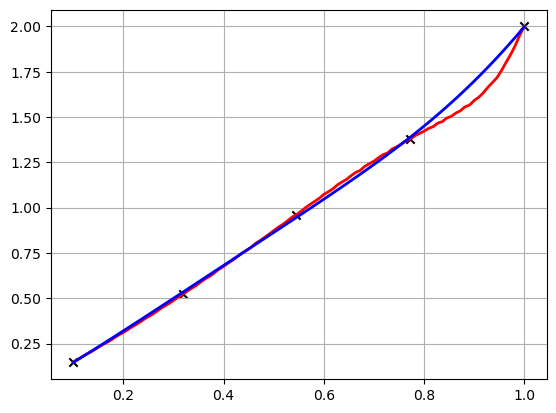

In [8]:
x = range(100)
plt.figure()

plt.plot(xx, y['hi'][x,0,1],color='red', linewidth=2.0,label='hi_ref')
plt.plot(xx, nn_pred_h.detach().numpy(),color='blue', linewidth=2.0,label='hi_nn')
plt.scatter(x_train.reshape(1,-1), y_train.reshape(1,-1),color='black', marker='x',label='sample_points')

plt.grid(True)
plt.show()

In [9]:
train_index = [int(np.floor(i)) for i in np.linspace(0,99,20)]

x_train = xx[train_index].reshape((-1, 1))
y_train = yy[train_index].reshape((-1, 1))

In [11]:
# dnn
in_N = 1
width = 10
depth = 2
out_N = 1


model_h = NN1(in_N, width, depth, out_N)
model_h.apply(weights_init)
optimizer = optim.Adam(model_h.parameters(), lr=0.001)
nIter = 5000
it = 0
loss_value = 1
while loss_value > 1e-4:
    pred_h = model_h(torch.from_numpy(x_train).float())
    loss = torch.mean(torch.square(pred_h - torch.from_numpy(y_train).float()))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    loss_value = loss.item()
    if it % 50 == 0:
        print('It:', it, 'Loss', loss.item())
    it = it + 1
nn_pred_h = model_h(torch.from_numpy(xx.reshape((-1, 1))).float())

It: 0 Loss 0.9337624311447144
It: 50 Loss 0.08615447580814362
It: 100 Loss 0.04729514569044113
It: 150 Loss 0.01984875090420246
It: 200 Loss 0.010106515139341354
It: 250 Loss 0.008662795647978783
It: 300 Loss 0.008261227048933506
It: 350 Loss 0.007893582805991173
It: 400 Loss 0.007533865515142679
It: 450 Loss 0.007185974158346653
It: 500 Loss 0.006852604448795319
It: 550 Loss 0.006535456981509924
It: 600 Loss 0.0062354258261621
It: 650 Loss 0.005952826701104641
It: 700 Loss 0.005687574855983257
It: 750 Loss 0.005439241416752338
It: 800 Loss 0.0052071851678192616
It: 850 Loss 0.004990601446479559
It: 900 Loss 0.004788587801158428
It: 950 Loss 0.0046001942828297615
It: 1000 Loss 0.004424412734806538
It: 1050 Loss 0.004260252229869366
It: 1100 Loss 0.0041067348793148994
It: 1150 Loss 0.003962894435971975
It: 1200 Loss 0.003827828448265791
It: 1250 Loss 0.003700659377500415
It: 1300 Loss 0.003580563236027956
It: 1350 Loss 0.0034667826257646084
It: 1400 Loss 0.0033585969358682632
It: 1450 L

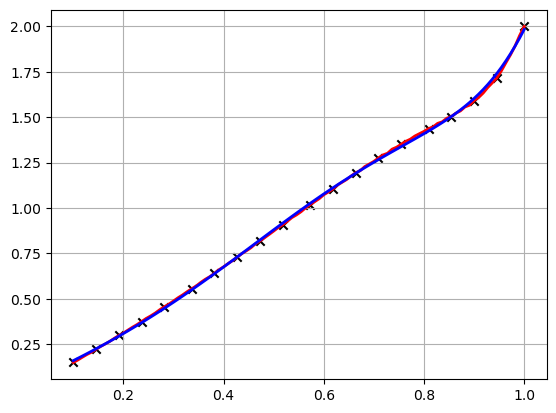

In [12]:
plt.figure()

plt.plot(xx, y['hi'][x,0,1],color='red', linewidth=2.0,label='hi_ref')
plt.plot(xx, nn_pred_h.detach().numpy(),color='blue', linewidth=2.0,label='hi_nn')
plt.scatter(x_train.reshape(1,-1), y_train.reshape(1,-1),color='black', marker='x',label='sample_points')

plt.grid(True)
plt.show()

### using mfdnn

In [14]:
x = np.linspace(0.1, 1, 100)
# (1,1) element of CH
y_hi = y['hi'][:,0,1]
y_lo = y['low'][:,0,1]
train_index_lo = [int(np.floor(i)) for i in np.linspace(0,99,20)]
train_index_hi = [int(np.floor(i)) for i in np.linspace(0,99,5)]

In [15]:
x_train_lo = x[train_index_lo].reshape(-1, 1)
y_train_lo = y_lo[train_index_lo].reshape(-1, 1)


In [38]:
# dnn
# model_L: nn_l
model_L = NN1(1, 20, 4, 1)
model_L.apply(weights_init)
optimizer = optim.Adam(model_L.parameters(), lr=1e-3)
loss_value = 1
x_lo_r = torch.from_numpy(x_train_lo).float()
x_lo_r.requires_grad_()
it = 0
while loss_value > 5e-5:
    pred_h = model_L(x_lo_r)
    grads = autograd.grad(outputs=pred_h, inputs=x_lo_r,
                            grad_outputs=torch.ones_like(pred_h),
                            create_graph=True, retain_graph=True, only_inputs=True)[0]
    loss = torch.mean(torch.square(pred_h - torch.from_numpy(y_train_lo).float()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    loss_value = loss.item()
    if it % 50 == 0:
        print('It:', it, 'Loss', loss.item())
    it = it + 1


It: 0 Loss 1.905887246131897
It: 50 Loss 0.03948256000876427
It: 100 Loss 0.007618790026754141
It: 150 Loss 0.006757051683962345
It: 200 Loss 0.006208362523466349
It: 250 Loss 0.005722330883145332
It: 300 Loss 0.005286274943500757
It: 350 Loss 0.004889717325568199
It: 400 Loss 0.004524382296949625
It: 450 Loss 0.004183847922831774
It: 500 Loss 0.0038630892522633076
It: 550 Loss 0.0035581246484071016
It: 600 Loss 0.0032658406998962164
It: 650 Loss 0.002983890241011977
It: 700 Loss 0.0027107393834739923
It: 750 Loss 0.002445754362270236
It: 800 Loss 0.0021893871016800404
It: 850 Loss 0.0019433468114584684
It: 900 Loss 0.0017106820596382022
It: 950 Loss 0.0014957081293687224
It: 1000 Loss 0.001303563010878861
It: 1050 Loss 0.001139282830990851
It: 1100 Loss 0.001006527105346322
It: 1150 Loss 0.0009062307071872056
It: 1200 Loss 0.0008359656203538179
It: 1250 Loss 0.0007904068334028125
It: 1300 Loss 0.0007628424791619182
It: 1350 Loss 0.000746929959859699
It: 1400 Loss 0.0007377754664048553

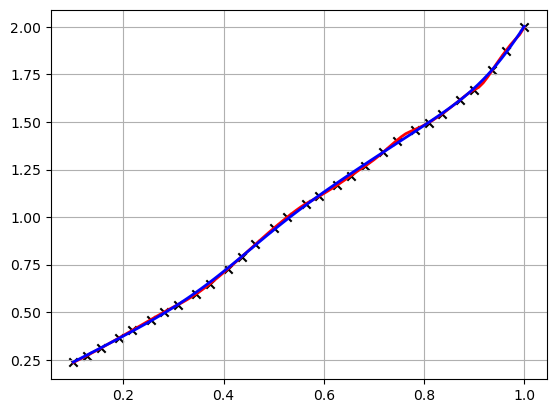

In [39]:
nn_pred_l = model_L(torch.from_numpy(x.reshape((-1, 1))).float())
plt.figure()
plt.plot(x, y_lo,color='red', linewidth=2.0,label='hi_ref')
plt.plot(x, nn_pred_l.detach().numpy(),color='blue', linewidth=2.0,label='hi_nn')
plt.scatter(x_train_lo.reshape(1,-1), y_train_lo.reshape(1,-1),color='black', marker='x',label='sample_points')

plt.grid(True)
plt.show()

In [34]:
xx = np.linspace(0.1, 1, 100)
# (1,1) element of CH
yy_hi = y['hi'][:,0,1]
yy_lo = y['low'][:,0,1]

train_index_lo = [int(np.floor(i)) for i in np.linspace(0,99,30)]
# train_index_hi = [int(np.floor(i)) for i in np.linspace(0,99,6)]
train_index_hi = [0,29,59,89,99]
x_train_lo = xx[train_index_lo].reshape((-1, 1))
y_train_lo = yy_lo[train_index_lo].reshape((-1, 1))
x_train_hi = xx[train_index_hi].reshape((-1, 1))
y_train_hi = yy_hi[train_index_hi].reshape((-1, 1))
x_test = xx
y_test_lo = yy_lo
y_test_hi = yy_hi


In [67]:
# dnn with linear sub nn
model_noLinear = NN1(2, 30, 3, 1)
model_noLinear.apply(weights_init)
model_Linear = NN2(2, 10, 1, 1)
model_Linear.apply(weights_init)
alpha = torch.tensor([0.1])
# model_Alpha = nn.Linear(2,1,bias=False)
optimizer2 = optim.Adam([{'params': model_noLinear.parameters()},
                         {'params': model_Linear.parameters()},
                         # {'params': model_L.parameters(), 'weight_decay': 0.01},
                          {'params': alpha}], lr=1e-3)
nIter2 = 10000
x_lo_r = torch.from_numpy(x_train_lo).float()
x_lo_r.requires_grad_()
loss2_value = 1
it = 0
# x_lo_r.requires_grad_()
while loss2_value > 1e-5 and it < nIter2:
    # pred_h = model_L(x_lo_r)
    # grads = autograd.grad(outputs=pred_h, inputs=x_lo_r,
    #                         grad_outputs=torch.ones_like(pred_h),
    #                         create_graph=True, retain_graph=True, only_inputs=True)[0]
    # loss3 = torch.mean(torch.square(pred_h - torch.from_numpy(y_train_lo).float()))

    pred_2h = model_L(torch.from_numpy(x_train_hi).float())
    pred_2 = alpha * model_noLinear(torch.cat((torch.from_numpy(x_train_hi).float(), pred_2h), 1)) +\
              (1 - alpha) * model_Linear(torch.cat((torch.from_numpy(x_train_hi).float(), pred_2h), 1))
    # pred_nl = model_noLinear(torch.cat((torch.from_numpy(x_train_hi).float(), pred_2h), 1))
    # pred_l = model_Linear(torch.cat((torch.from_numpy(x_train_hi).float(), pred_2h), 1))
    
    # pred_2 = model_Alpha(torch.cat((pred_nl,pred_l),1))
               
    # loss2 = torch.mean(torch.square(pred_2 - torch.from_numpy(y_train_hi))) + loss3
    loss2 = torch.mean(torch.square(pred_2 - torch.from_numpy(y_train_hi))) 
    loss2_value = loss2.item()
    optimizer2.zero_grad()
    loss2.backward()
    optimizer2.step()
    if it % 100 == 0:
        print('It:', it, 'Loss:', loss2.item())
    it = it + 1


It: 0 Loss: 3.7684716110181107
It: 100 Loss: 0.05533812539585877
It: 200 Loss: 0.003611383362638302
It: 300 Loss: 0.002307350766488141
It: 400 Loss: 0.0017888119817078226
It: 500 Loss: 0.0015120554596354373
It: 600 Loss: 0.0013366611187579068
It: 700 Loss: 0.0012114727590850285
It: 800 Loss: 0.0011147109909953503
It: 900 Loss: 0.0010357081423074607
It: 1000 Loss: 0.0009680410033974012
It: 1100 Loss: 0.0009072402974897687
It: 1200 Loss: 0.0008499440471629361
It: 1300 Loss: 0.0007934342001907791
It: 1400 Loss: 0.0007352845336393917
It: 1500 Loss: 0.0006732643131627644
It: 1600 Loss: 0.0006054041521058266
It: 1700 Loss: 0.0005304181790483807
It: 1800 Loss: 0.00044829720733214164
It: 1900 Loss: 0.0003610104424884292
It: 2000 Loss: 0.0002728117216756267
It: 2100 Loss: 0.00018997557918110916
It: 2200 Loss: 0.00011953796721761849
It: 2300 Loss: 6.679277267373365e-05
It: 2400 Loss: 3.282903357115315e-05
It: 2500 Loss: 1.4249497918746487e-05


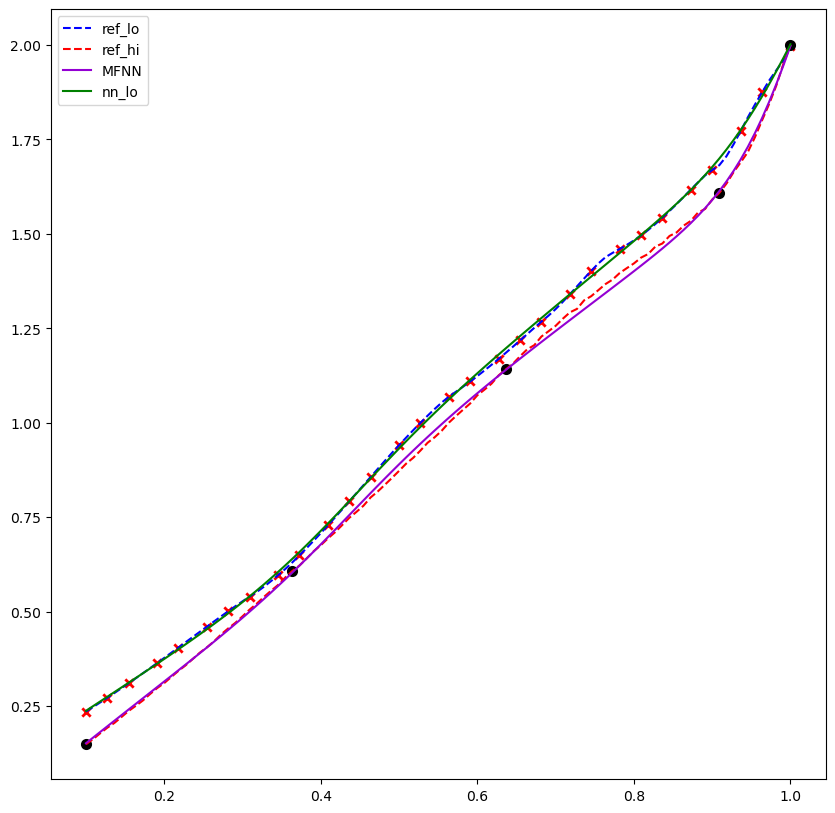

In [68]:

y_lo_nn = model_L(torch.from_numpy(x_test.reshape((-1,1))).float())
y_hi_mfnn = alpha * model_noLinear(torch.cat((torch.from_numpy(x_test.reshape((-1,1))).float(), y_lo_nn), 1)) +\
              (1 - alpha) * model_Linear(torch.cat((torch.from_numpy(x_test.reshape((-1,1))).float(), y_lo_nn), 1))
# y_hi_mfnn = model_Alpha(torch.cat((model_noLinear(torch.cat((torch.from_numpy(x_test.reshape((-1,1))).float(), y_lo_nn), 1)),
#   model_Linear(torch.cat((torch.from_numpy(x_test.reshape((-1,1))).float(), y_lo_nn), 1))),1))
    


fig4, ax4 = plt.subplots(figsize=(10,10))
line1 = ax4.plot(x_test, y_test_lo, label='ref_lo',ls='--', color='blue')
line2 = ax4.plot(x_test, y_test_hi, label='ref_hi',ls='--', color='red')
line3 = ax4.plot(x_test, y_hi_mfnn.detach().numpy(), label='MFNN',ls='-', color='darkviolet')
line4 = ax4.plot(x_test, y_lo_nn.detach().numpy(), label='nn_lo',ls='-', color='green')

ax4.scatter(x_train_lo, y_train_lo, marker='x', color='red', linewidth=2)
ax4.scatter(x_train_hi, y_train_hi, marker='o', color='black', linewidth=2)
ax4.legend()
plt.show()

In [49]:
pred_2

tensor([[0.1685],
        [0.5931],
        [1.1483],
        [1.6583],
        [1.9393]], grad_fn=<AddBackward0>)

In [50]:
y_train_hi

array([[0.14895776],
       [0.607612  ],
       [1.14139541],
       [1.60879894],
       [1.9999324 ]])